In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
advertising_multi = pd.read_csv('/home/sahil/Desktop/MLpracticeCommit/data/advertising.csv')

In [64]:
advertising_multi.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [65]:
advertising_multi.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [66]:
advertising_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
advertising_multi.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


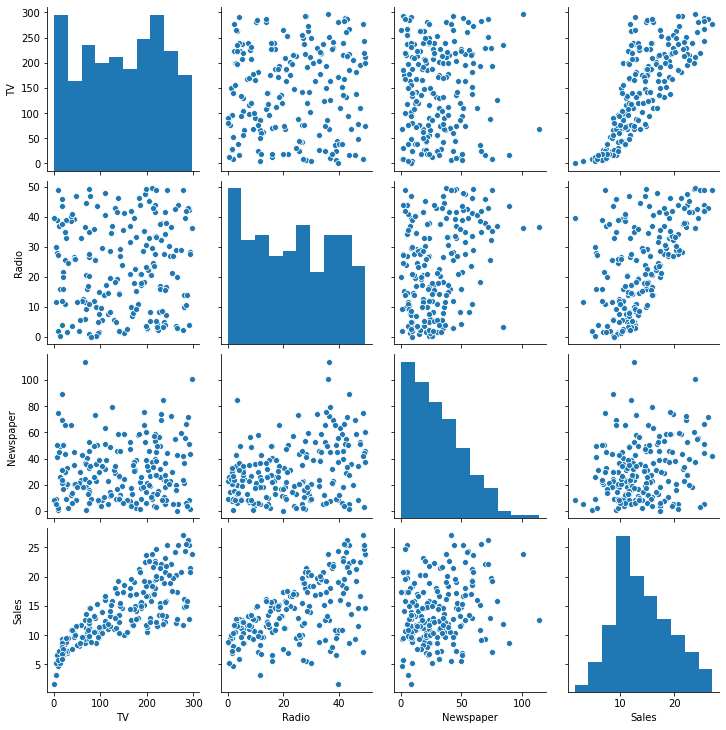

In [67]:
#pairplot between all possible pair of columns
sns.pairplot(advertising_multi)

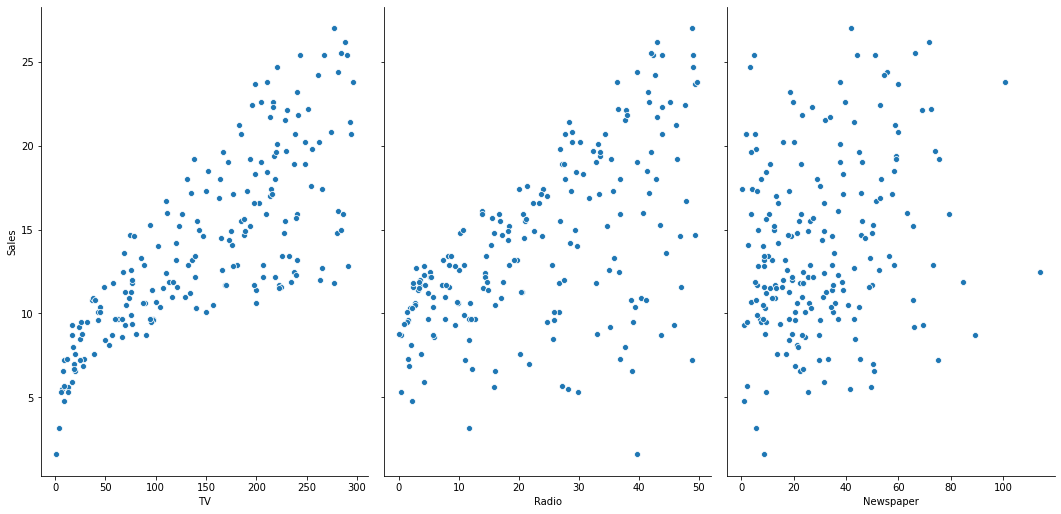

In [22]:
#visualising sales wrt all the mediums
sns.pairplot(advertising_multi, x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=7,aspect=0.7)

In [23]:
from sklearn.model_selection import train_test_split 

In [25]:
X = advertising_multi[['TV', 'Radio', 'Newspaper']]

In [26]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [27]:
y = advertising_multi['Sales']

In [31]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.7,random_state=100)

In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60, 3)
(140, 3)
(60,)
(140,)


In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [37]:
#fit the data model using lm.fit()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
print(lm.intercept_)

2.930080155199537


In [45]:
coeff_df = pd.DataFrame(lm.coef_,x_test.columns,columns=['coefficient'])

In [48]:
#as we can see the newspaper coefficient is the least.
#the coeff indicates for eg, for every unit sale increase in tv the overall sales increase by 0.05
coeff_df

,coefficient
TV,0.050326
Radio,0.141687
Newspaper,0.023035


In [49]:
#making predictions using the model
y_pred = lm.predict(x_test)

In [51]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test,y_pred)

In [52]:
print('mean squared error is: ', mse)
print('r sqaured value is: ', r_squared)

mean squared error is:  3.856094975975989
r sqaured value is:  0.8285727341627298


In [73]:
import numpy.lib.recfunctions
#checkeing for p value using statsmodel
import statsmodels.api as sm
x_train_sm = x_train
#statsmodel dosent automatically add a constant like sklearn(x0=1) so we need to add a constant explicitly
#sm.add_constant(x) in order to add a constant
x_train_sm = sm.add_constant(x_train_sm)
#create a fitted model in one line, OLS=ordinary least square
lm_1 = sm.OLS(y_train,x_train_sm).fit()

#print the coefficient
lm_1.params

ModuleNotFoundError: No module named 'numpy.lib.recfunctions'